# 가우시안 정규 분포

**가우시안 정규 분포(Gaussian normal distribution)** 혹은 간단히 정규 분포(normal distribution)라고 하는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 많이 사용한다.

정규 분포는 평균 $\mu$와 분산 $\sigma^2$ 이라는 두 개의 모수만으로 정의되며 확률밀도함수(pdf: probability density function)는 다음과 같은 수식으로 표현된다.

$$ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

분산의 역수를 정밀도(precision) $\beta$라고 부르기도 한다.

$$ \beta = \dfrac{1}{\sigma^2} $$

정규 분포 중에서도 평균이 0 이고 분산이 1 인 ($\mu=0$, $\sigma^2=1$) 정규 분포를 **표준 정규 분포(standard normal distribution)**라고 한다.

정규 분포의 확률밀도함수는 다음과 같은 성질을 가진다.

* $x=\mu$일 때 확률밀도가 최대가 된다.
* $x=\infty$로 다가가거나 $x=-\infty$로 다가갈수록 확률밀도가 작아진다.

## SciPy를 사용한 정규 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 `norm` 클래스가 정규 분포 클래스이다. `loc` 인수로 기댓값 $\mu$를 설정하고 `scale` 인수로 표준편차 $\sqrt{\sigma^2}$를 설정한다.

In [1]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

`pdf` 메서드를 사용하면 확률밀도함수를 계산할 수 있다.

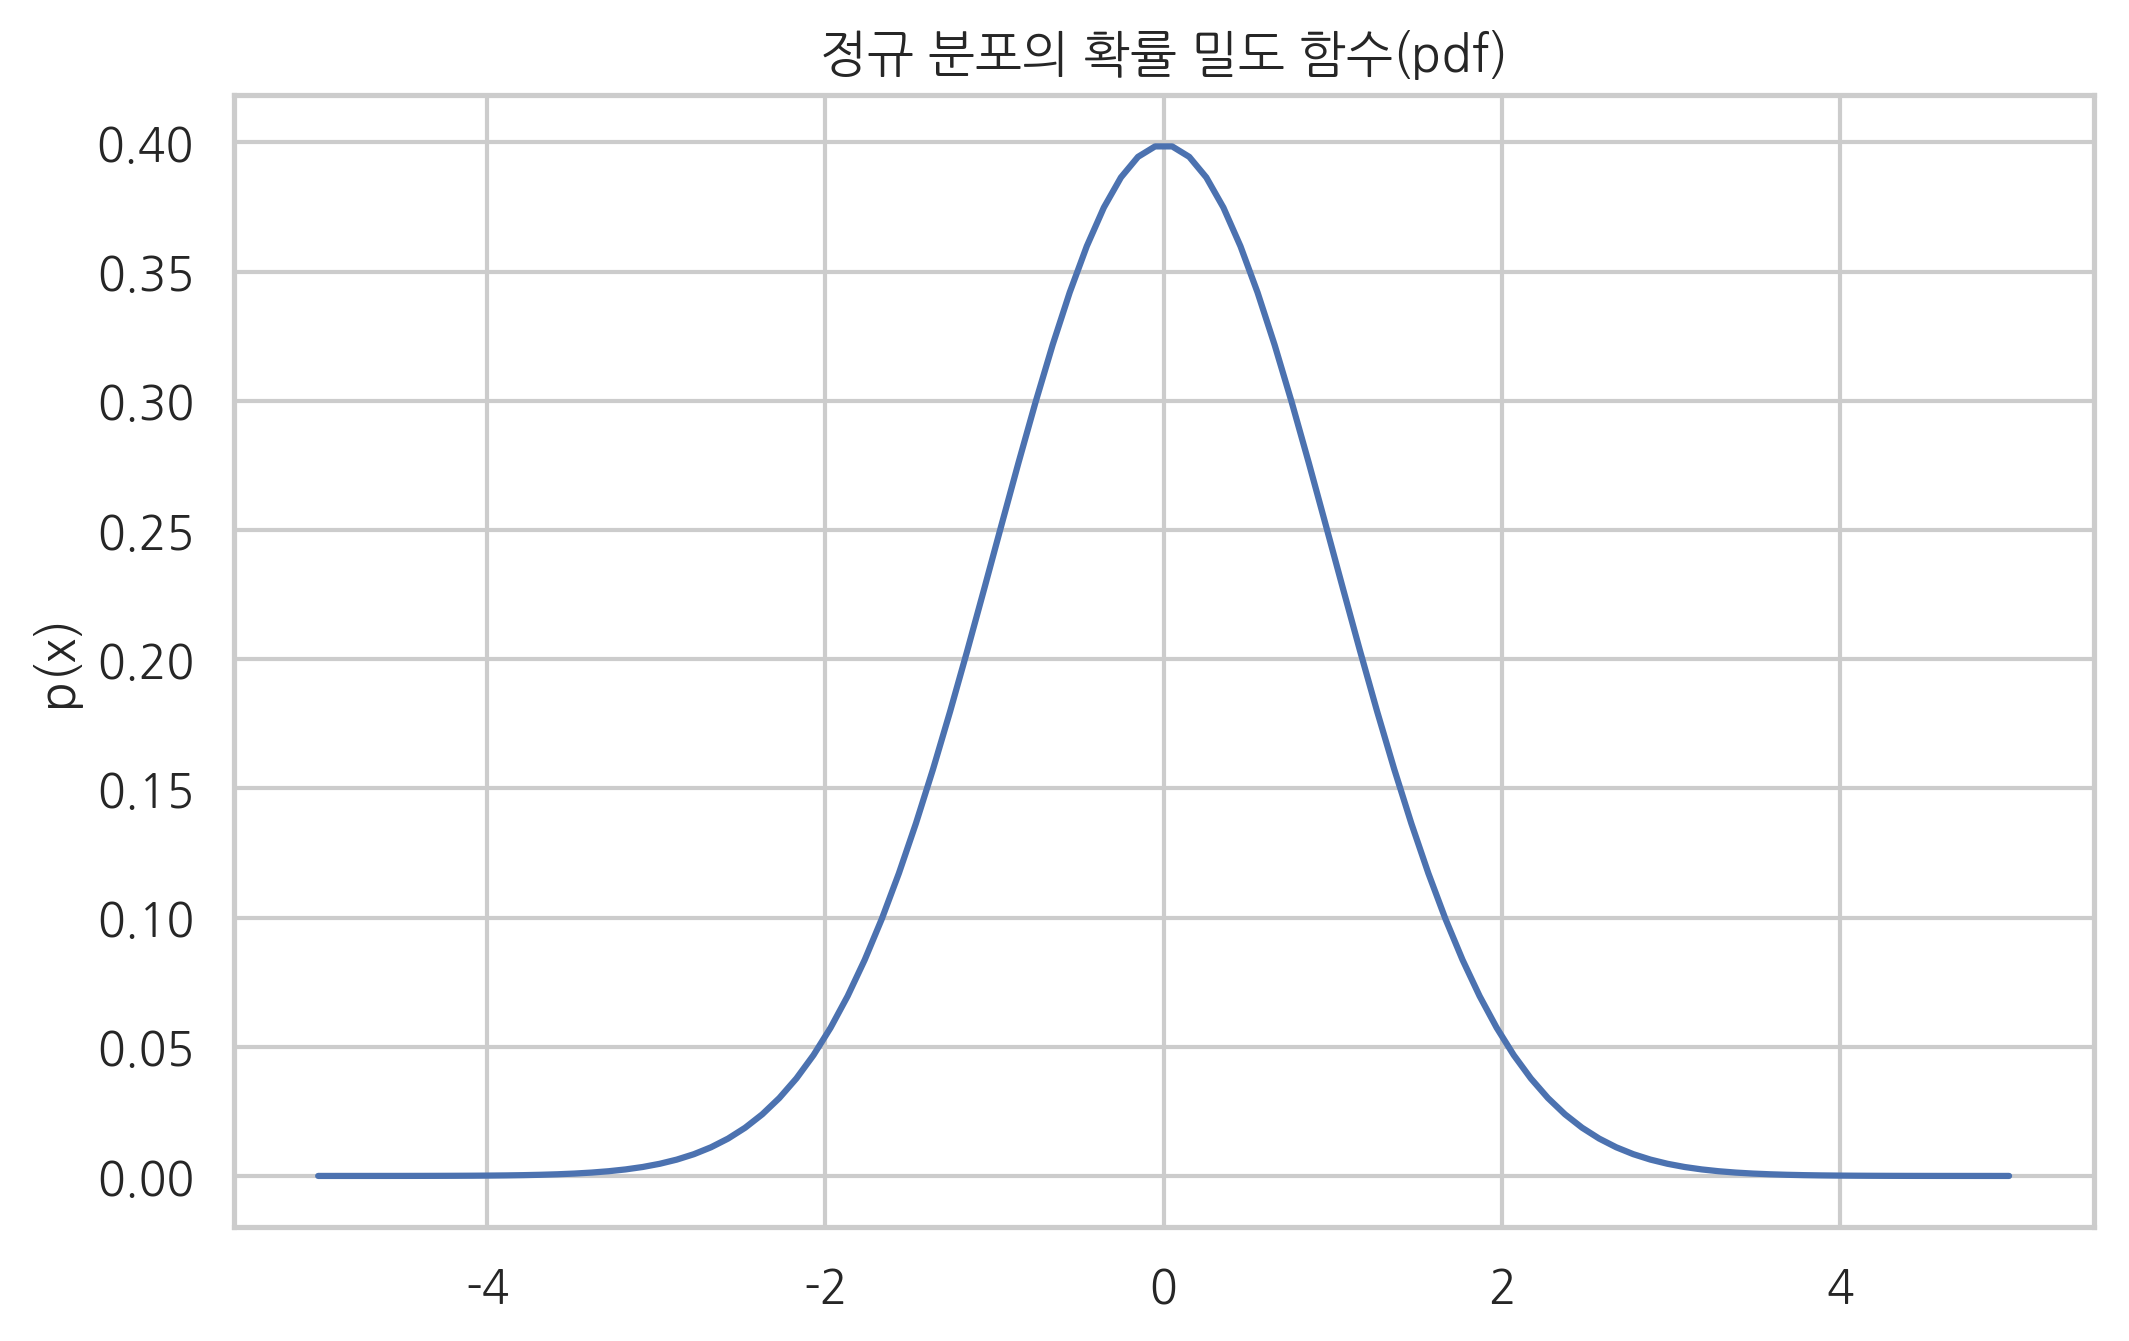

In [2]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("정규 분포의 확률 밀도 함수(pdf)")
plt.show()

시뮬레이션을 통해 표본을 얻으려면 `rvs` 메서드를 사용한다.

In [3]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

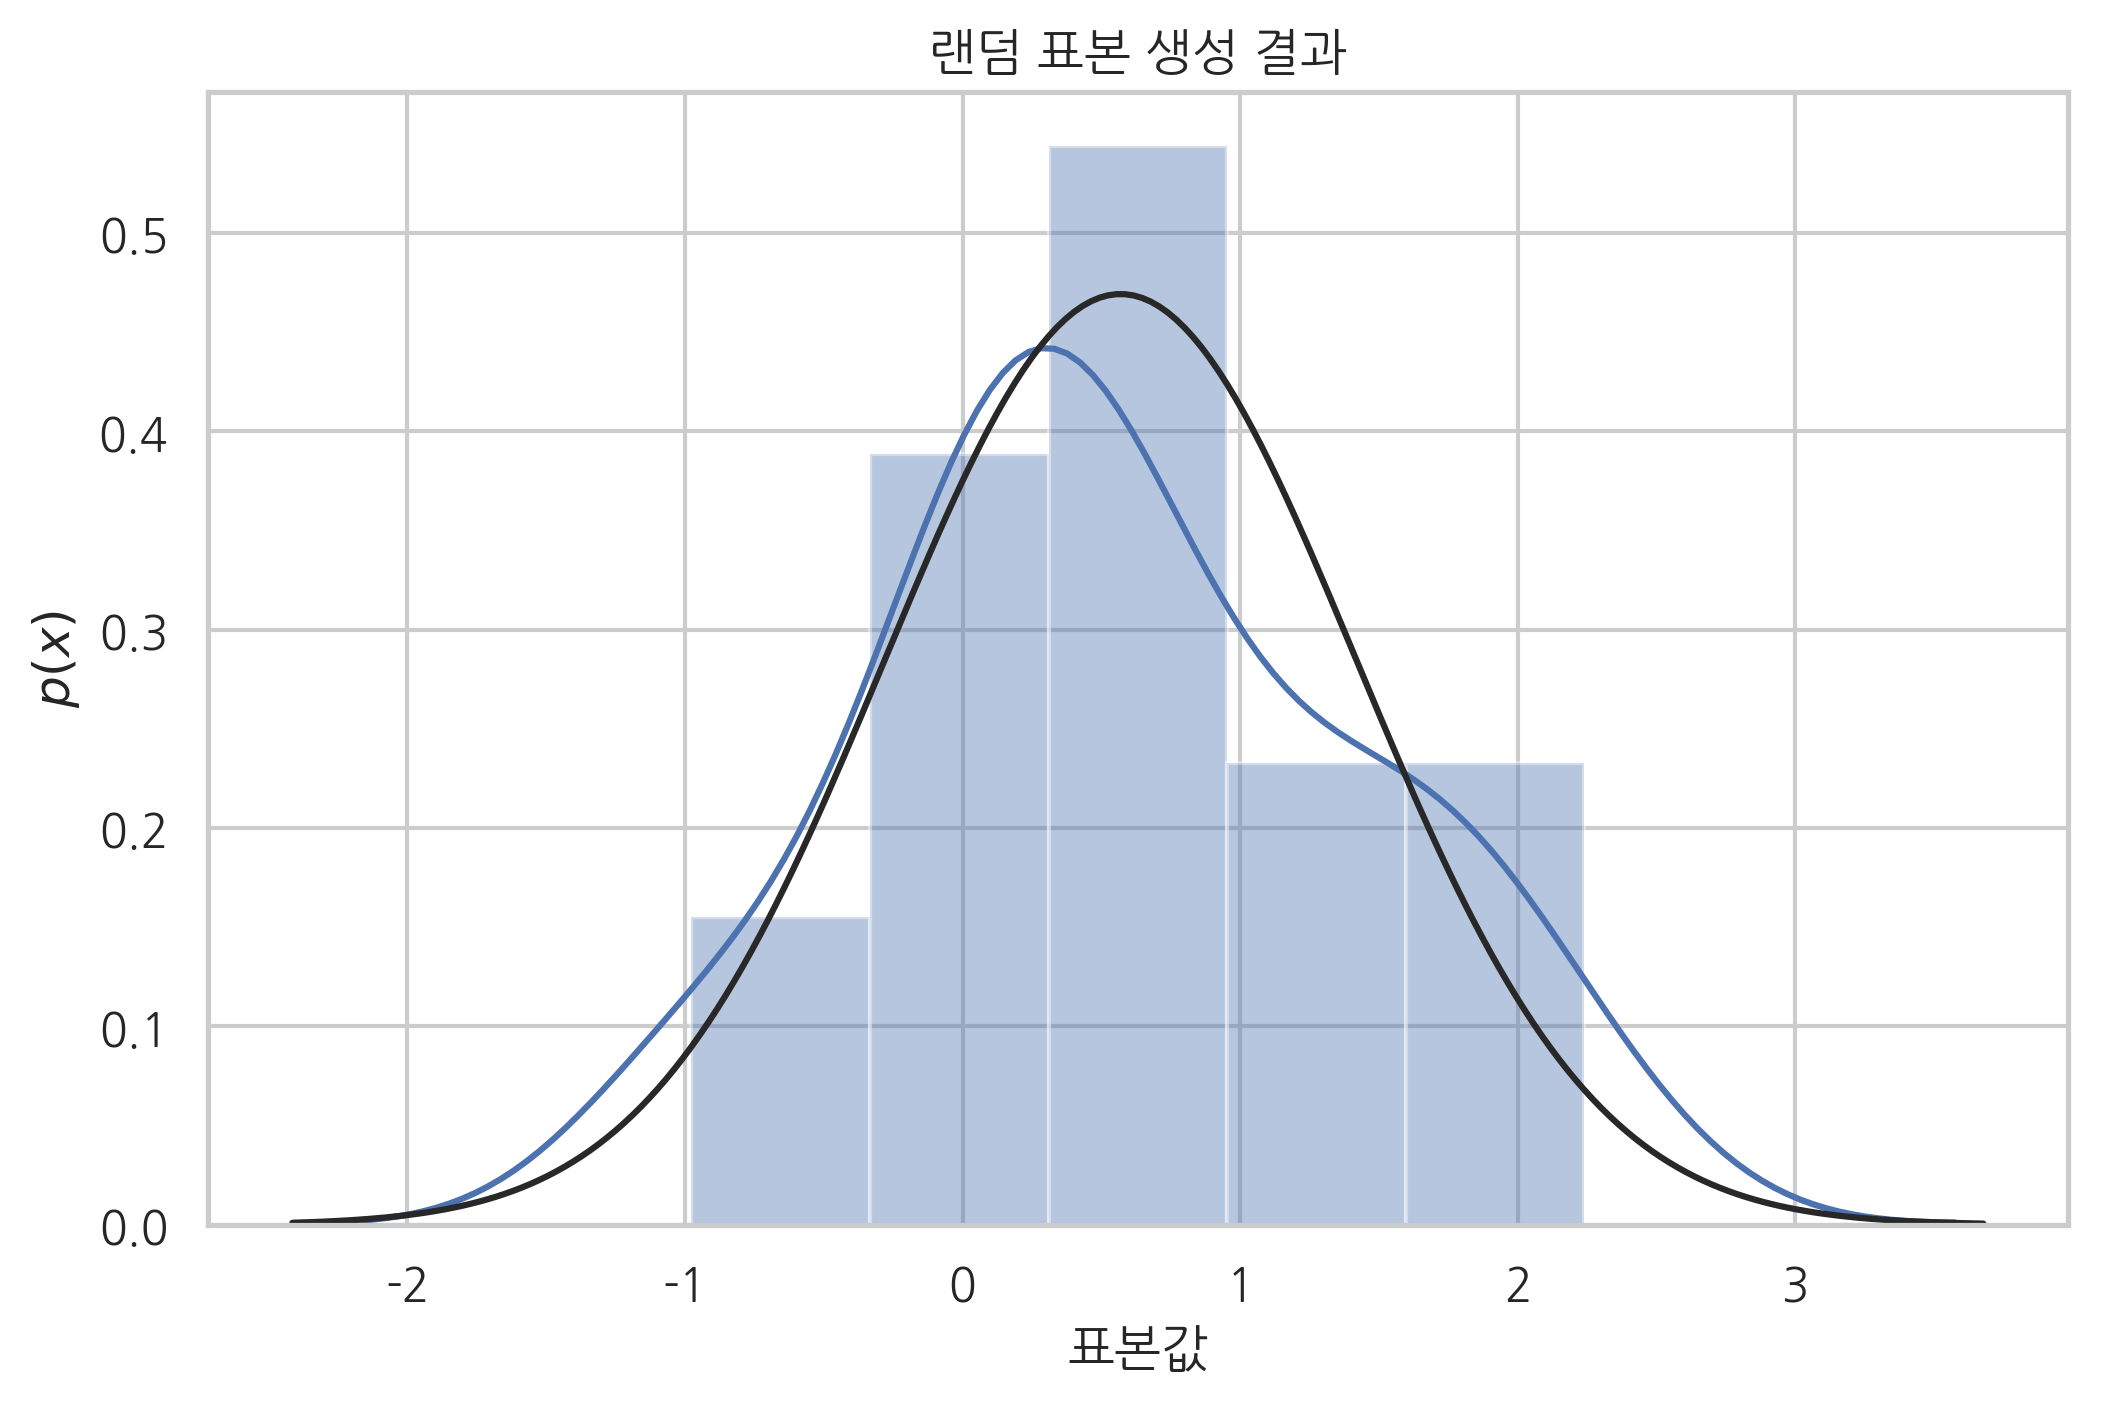

In [4]:
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("$p(x)$")
plt.show()

## Q-Q 플롯

정규 분포는 여러가지 연속확률분포 중에서도 가장 널리 사용되는 확률 분포이다. 어떤 확률변수의 분포가 정규 분포인지 아닌지 확인하는 **정규 분포 검정(normality test)**은 가장 중요한 통계적 분석 중의 하나이다. 

**Q-Q(Quantile-Quantile) 플롯**은 분석하고자 하는 표본 데이터의 분포와 정규 분포의 분포 형태를 비교하여 표본 데이터가 정규 분포를 따르는지 검사하는 간단한 시각적 도구이다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 데이터의 값을 한 쌍으로 만들어 그린 스캐터 플롯(scatter plot)이다. Q-Q 플롯을 그리는 방법은 다음과 같다. (여기에서는 대략적인 방법론을 서술하였으며 세부적인 사항은 다를 수 있다.)

1. 표본 데이터를 정렬(sort)한다. 
2. 하나하나의 표본 데이터가 전체 데이터 중의 몇 % 정도에 해당하는지 위치 값을 구한다. SciPy에서는 특정 순위의 값이 나타날 가능성이 높은 값을 뜻하는 순서 통계량(order statistics)이라는 값을 이용한다.
3. 각 표본 데이터의 위치 값이 정규 분포의 누적확률함수(cdf) 값이 되는 표준 정규 분포의 표본값을 구한다. 즉 확률값에 대한 누적확률함수의 역함수 값을 구한다. 이를 표본 정규 분포의 분위함수(quantile function)값이라고 한다. 예를 들어 표본 정규 분포의 1%의 분위함수값은 $F^{-1}(0.01)$, 약 -2.326이다.
4. 표본 데이터와 그에 대응하는 분위수를 하나의 쌍으로 간주하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 표본에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯을 완성한다.

정규 분포를 따르는 데이터 표본을 Q-Q 플롯으로 그리면 다음과 같이 직선의 형태로 나타난다.

In [5]:
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [6]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [7]:
qf = rv.ppf(position)
qf

array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
       -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
        0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
        0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ])

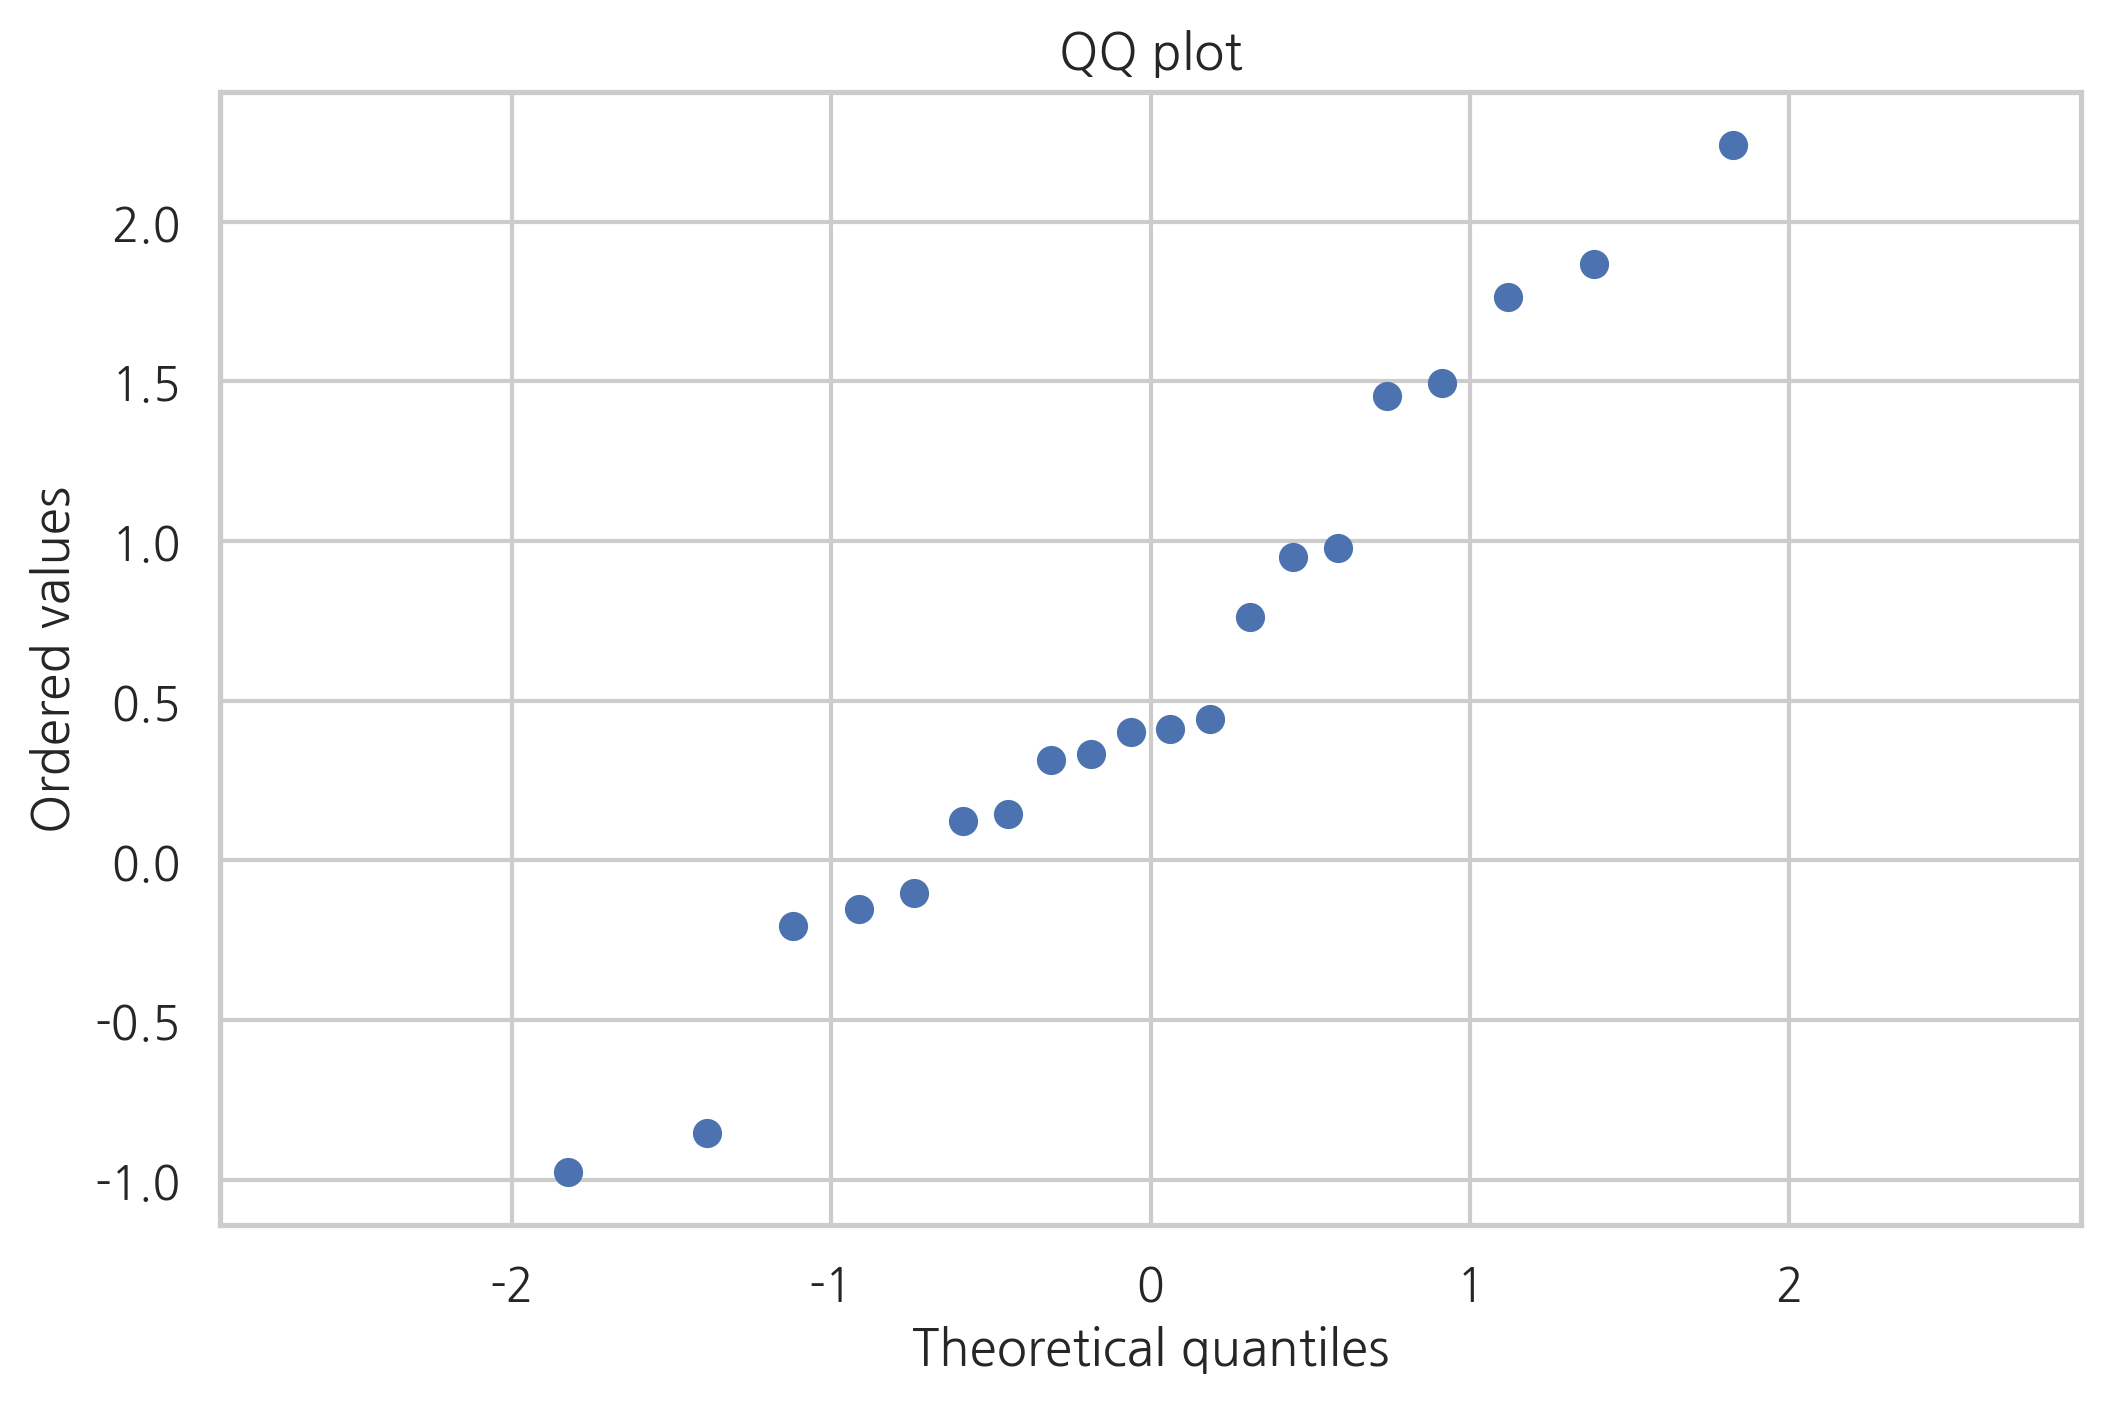

In [8]:
plt.scatter(qf, x_sorted)
plt.title("QQ plot")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Ordered values")
plt.axis("equal")
plt.show()

SciPy 패키지의 stats 서브 패키지는 Q-Q 플롯을 계산하고 그리기 위한 `probplot` 명령을 제공한다. 

* http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

`probplot`은 기본적으로 인수로 보낸 데이터 표본에 대한 Q-Q 정보만을 반환하고 챠트는 그리지 않는다. 만약 차트를 그리고 싶다면 `plot` 인수에 matplotlib.pylab 모듈 객체 혹은 `Axes` 클래스 객체를 넘겨주어야 한다.

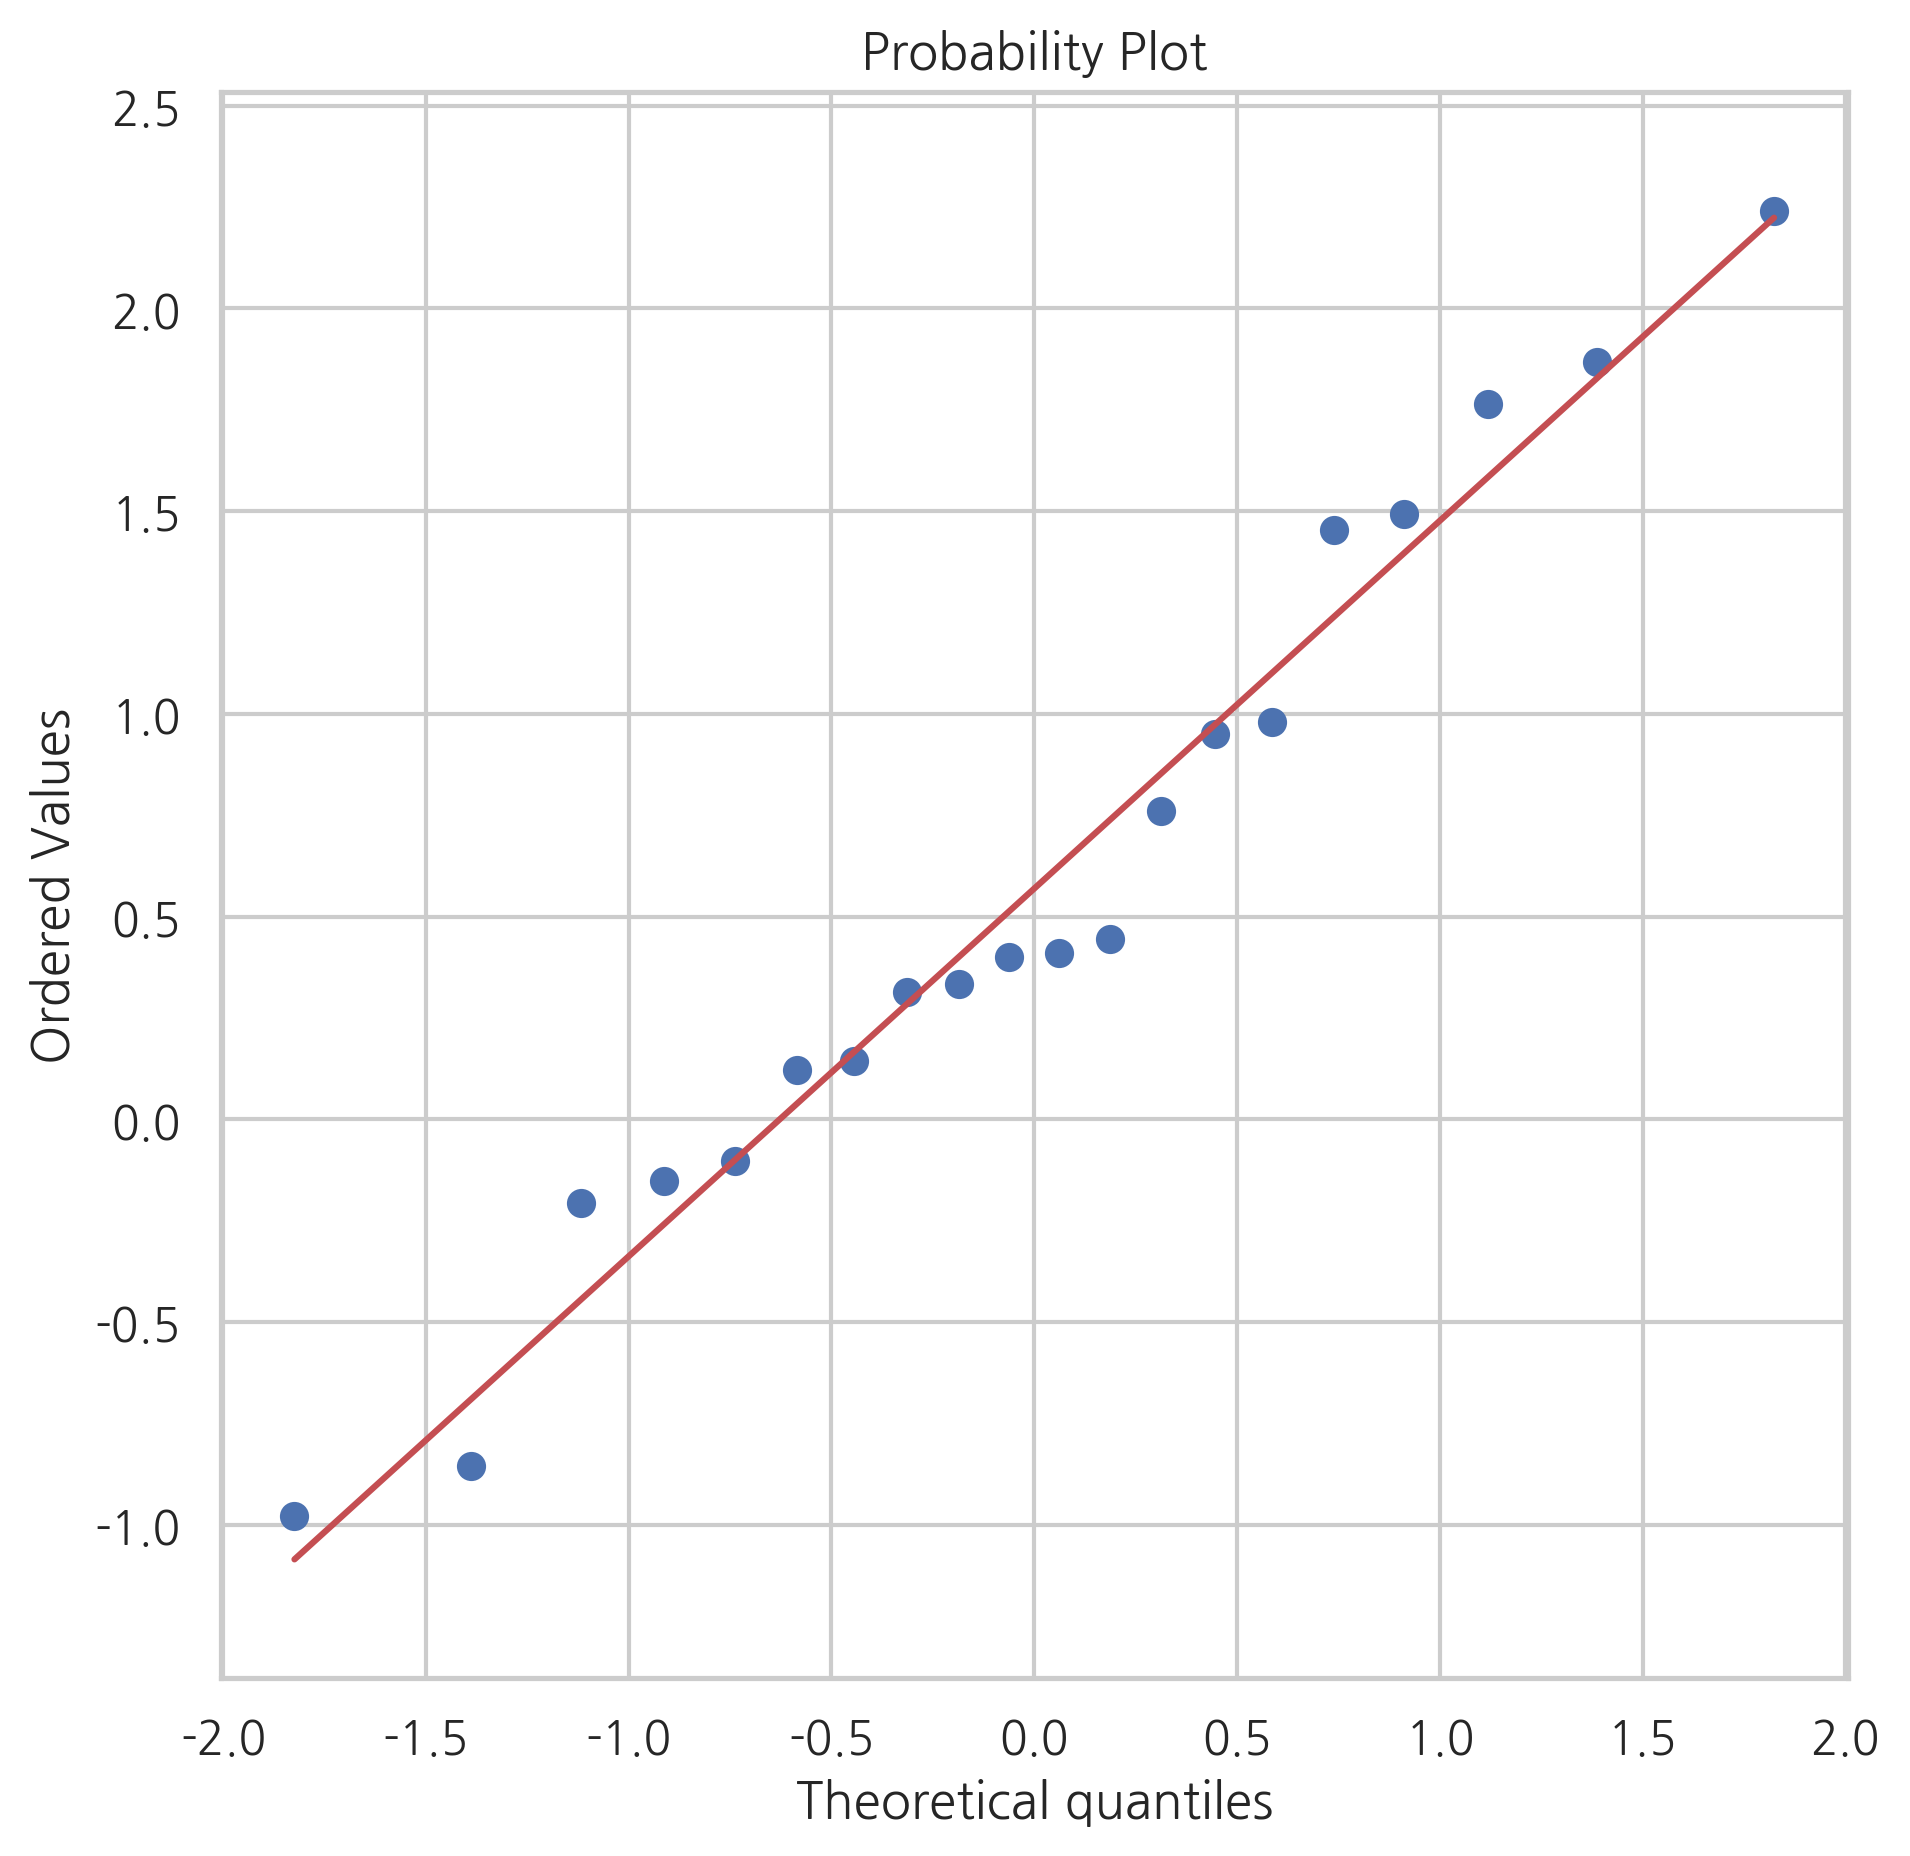

In [9]:
np.random.seed(0)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

정규 분포를 따르지 않는 데이터 표본을 Q-Q 플롯으로 그리면 다음과 같이 직선이 아닌 휘어진 형태로 나타난다.

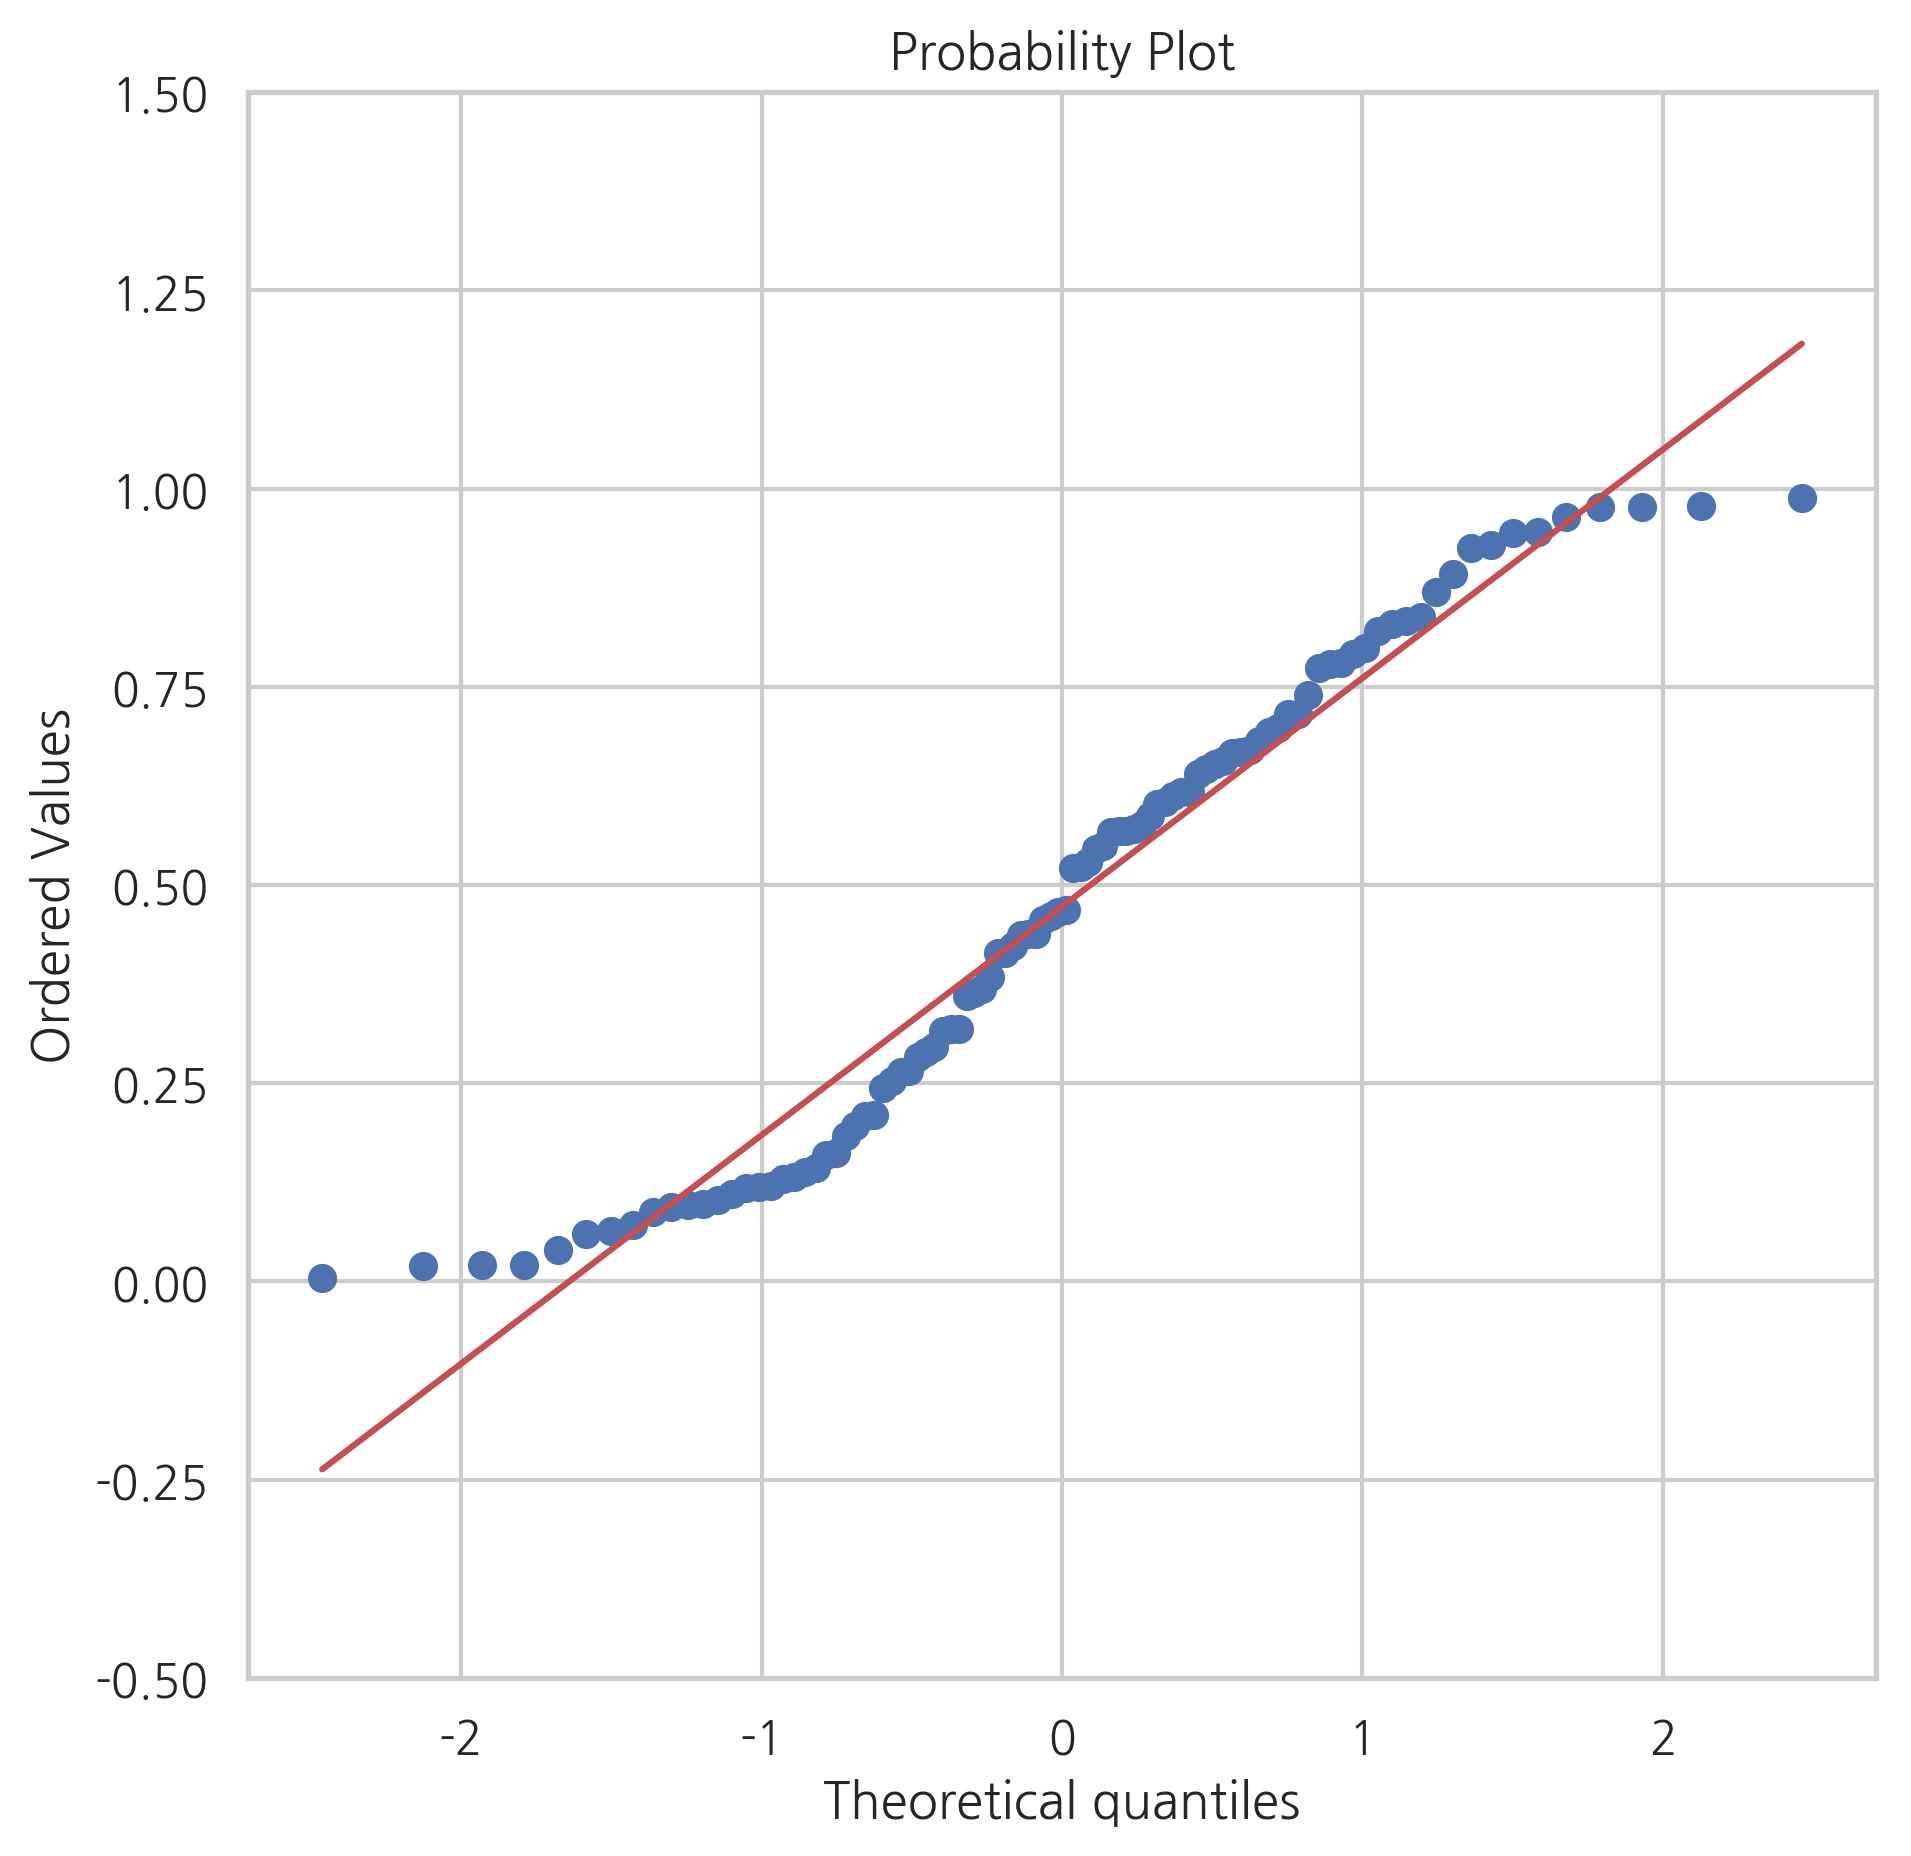

In [10]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

## 중심 극한 정리

실세계에서 발생하는 현상 중 많은 것들이 정규 분포로 모형화 가능하다. 그 이유 중의 하나는 다음과 같은 **중심 극한 정리(Central Limit Theorem)**이다. 중심 극한 정리는 여러 확률 변수의 합이 정규 분포와 비슷한 분포를 이루는 현상을 말한다.
중심 극한 정리를 수학적인 용어로 쓰면 다음과 같다.

$X_1, X_2, \ldots, X_N$가 기댓값이 $\mu$이고 분산이 $\sigma^2$으로 동일한 분포(기댓값과 분산의 값이 동일할 뿐이며 분포의 모양은 달라도 된다)이며 서로 독립인 확률 변수들이라고 하자. 분포가 어떤 분포인지는 상관없다.

$X_1, X_2, \ldots, X_N$에서 뽑은 각각의 표본 데이터 $x_1, x_2, \ldots, x_N$의 표본 평균

$$ \bar{x}_N = \dfrac{1}{N}(x_1+\cdots+x_N) $$ 

도 마찬가지로 예측할 수 없는 확률 변수이다. 이 확률 변수를 $\bar{X}_N$이라고 하자.

이 표본 평균의 평균이 0, 분산이 1이 되도록 다음처럼 정규화를 한다.

$$ \dfrac{\bar{x}_N - \mu}{\dfrac{\sigma}{\sqrt{N}}} $$

중심 극한 정리에 따르면 **정규화된 표본평균의 분포는 $N$이 증가할 수록 표준 정규 분포에 수렴**한다. 

$$ \dfrac{\bar{X}_N - \mu}{\dfrac{\sigma}{\sqrt{N}}} \xrightarrow{d}\ \mathcal{N}(x;0,1) $$

$\xrightarrow{d}$ 기호는 표본의 갯수 $N$이 커질수록 분포의 모양이 특정한 분포에 수렴한다는 것을 뜻한다.

시뮬레이션을 사용하여 중심 극한 정리가 성립하는지 살펴보도록 하자. 다음 시뮬레이션에서는 0부터 1까지의 균일 분포(uniform distribution)의 표본을 각각 1번, 2번, 10번 생성하여 그 합의 분포를 보았다. 여기에서는 0부터 1까지의 균일 분포의 기댓값이 $\frac{1}{2}$, 분산이 $\frac{1}{12}$라는 사실을 이용하였다.

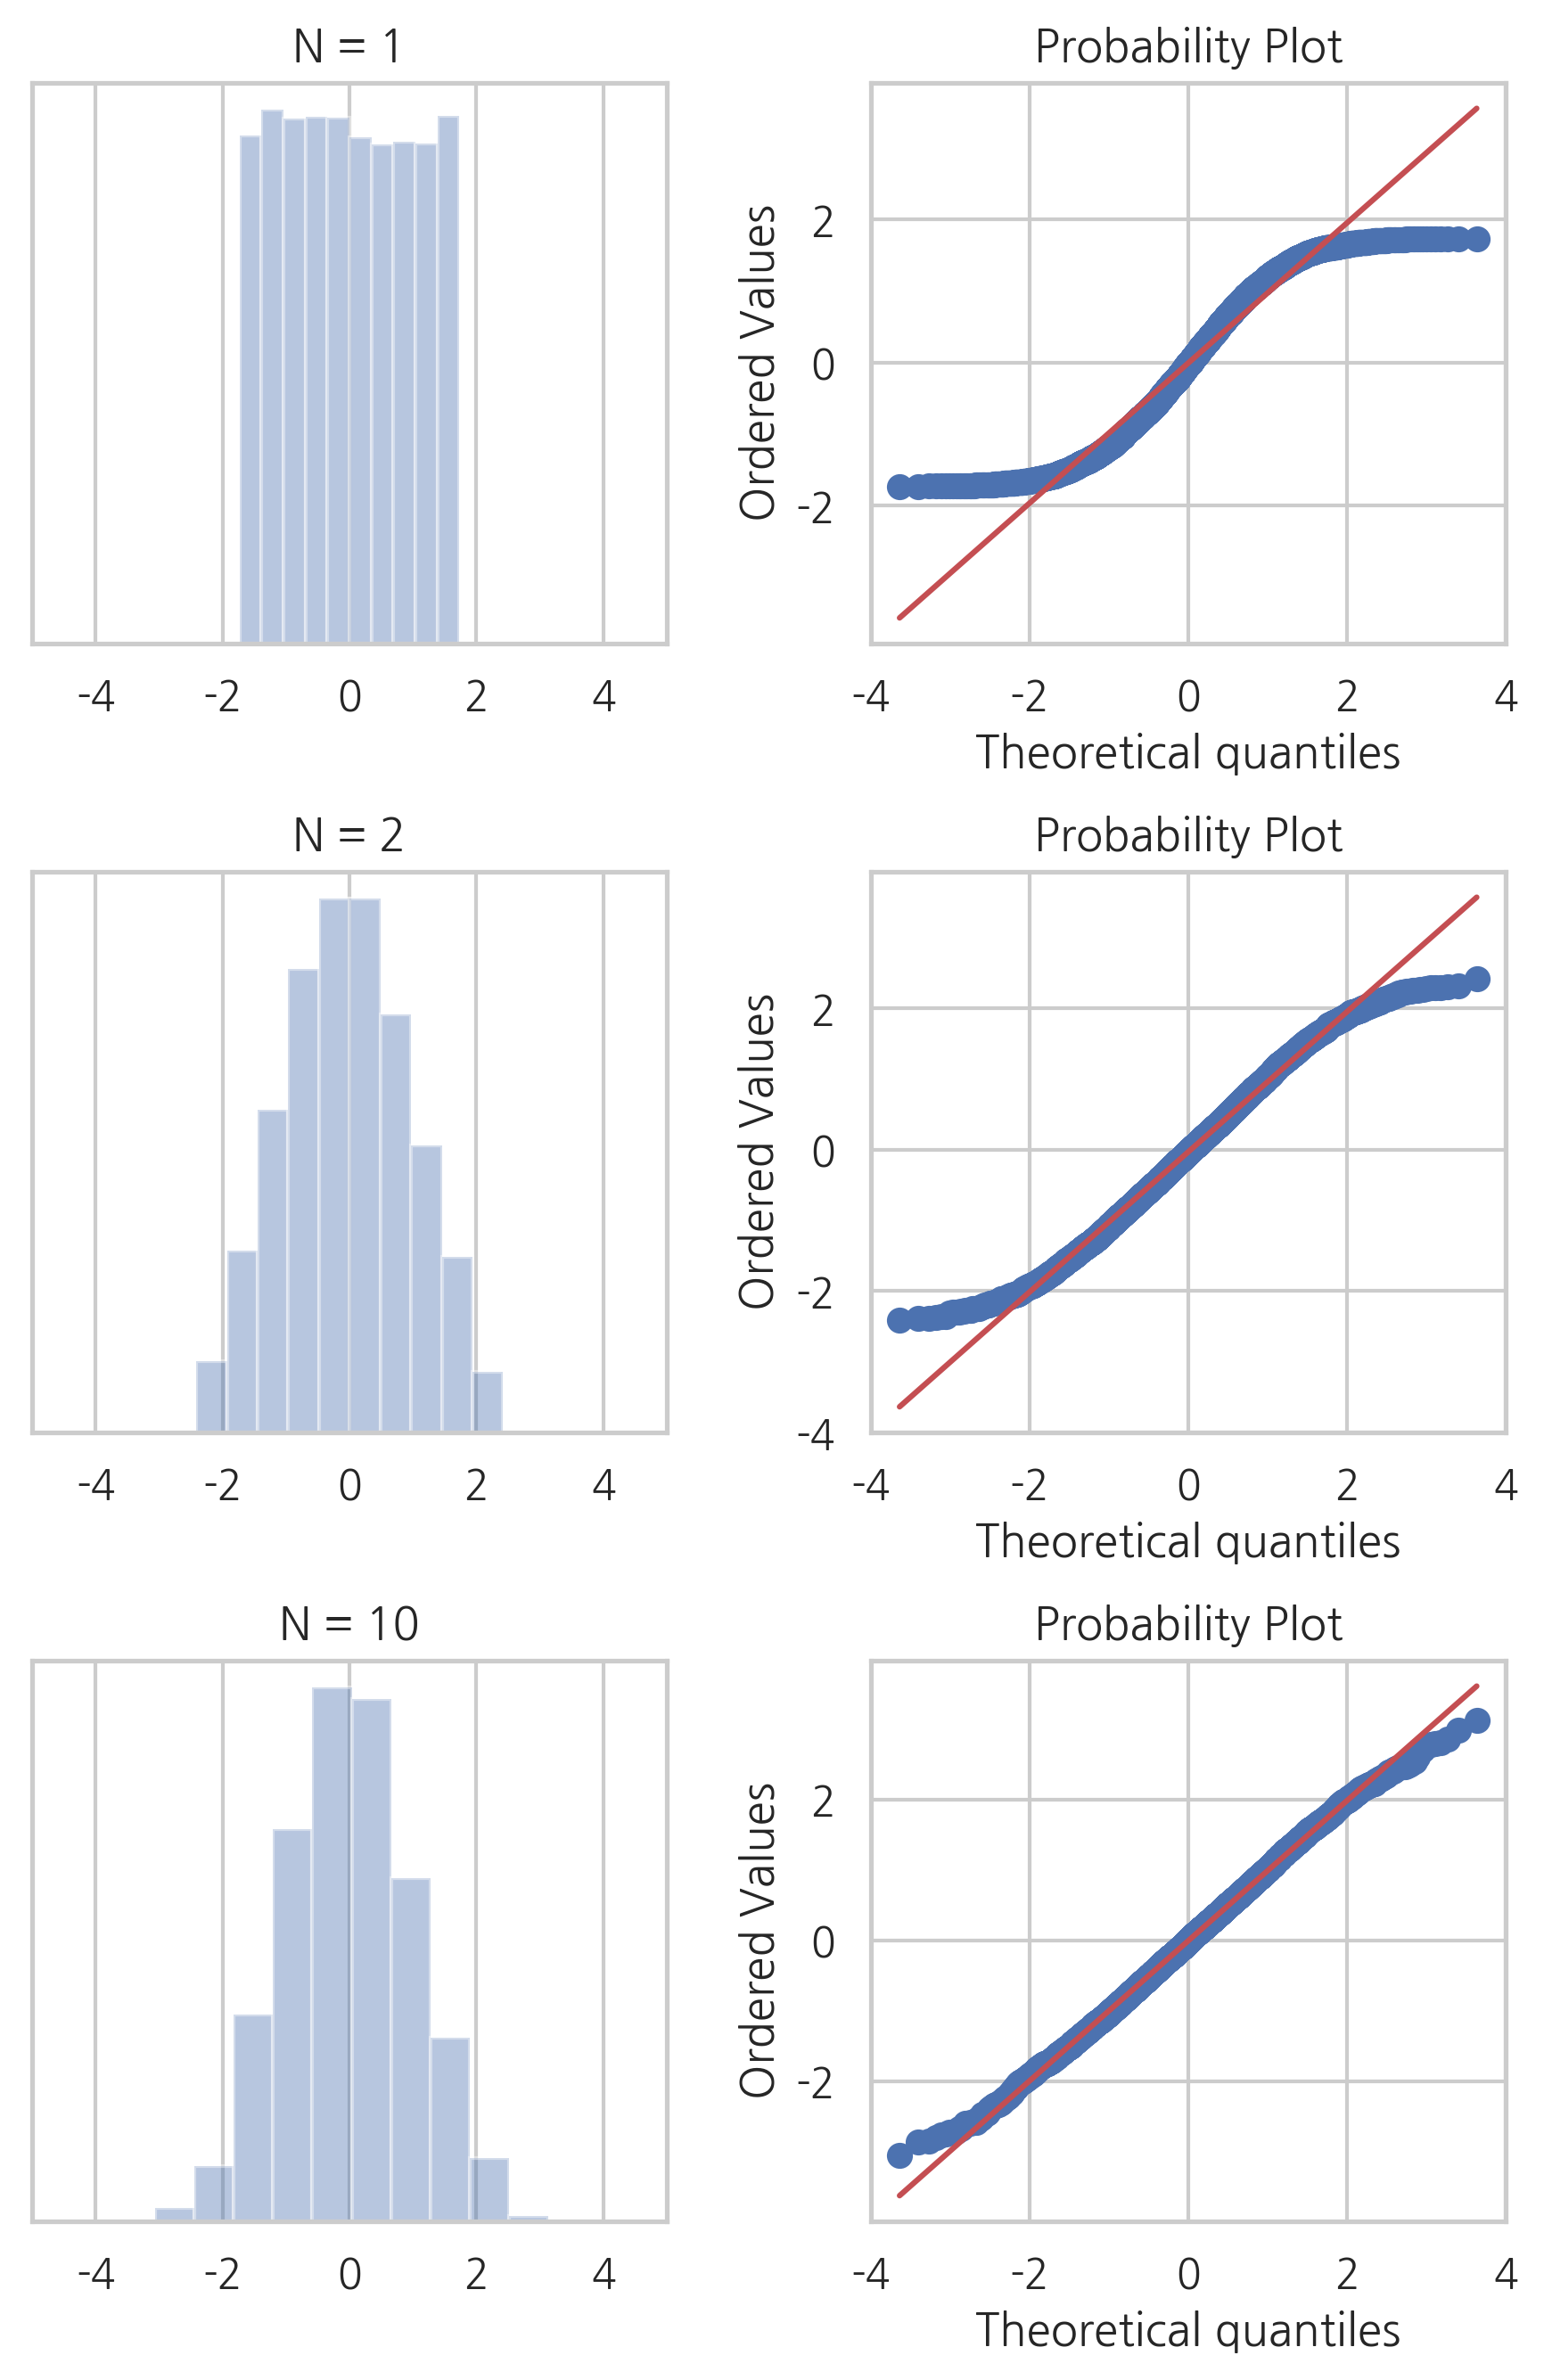

In [11]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()

더하는 분포의 수가 10개 정도가 되면 그 합은 정규 분포에 상당히 가까워짐을 볼 수 있다.

## 가우시안 정규 분포의 통계량 분포

그렇다면 임의의 분포가 아닌 복수의 가우시안 정규 분포로부터 얻은 표본 데이터로 구한 표본평균은 어떤 분포를 가지게 될까?

**복수의 가우시안 정규 분포로부터 얻은 표본의 합은 정규 분포**이다.

$$ x_i \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; \sum_{i=1}^N x_i \sim \mathcal{N}(N\mu, N\sigma^2) $$

가우시안 정규 분포의 표본에 상수를 빼거나 곱해도 가우시안 정규 분포이다. 따라서 표본 평균도 가우시안 정규분포이며 여기에서 상수 $N\mu$를 빼거나 상수 $\dfrac{\sigma}{\sqrt{N}}$로 나누어도 마찬가지로 가우시안 정규 분포이다. 다만 기댓값이 0, 표준편차가 1인 표준 정규 분포가 된다.

$$ x_i \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\;  z = \dfrac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{N}}} \sim \mathcal{N}(x;0,1) $$

가우시안 정규 분포 표본의 평균을 정규화한 통계량을 $z$ 통계량이라고 한다. 중심 극한 정리와 다른 점에 주의해야 한다. **중심 극한 정리에서는 표준 정규 분포로 점점 다가갈 뿐이고 표본의 갯수가 무한대가 되기 전에는 정확한 정규 분포가 아니지만 $z$ 통계량은 갯수 $N$에 상관없이 항상 정확하게 표준 정규 분포**이다.

#### 연습 문제 8.3.1

정규 분포로부터 나온 $N$개의 표본이 정규분포가 된다는 것을 시뮬레이션과 Q-Q 플롯을 사용하여 보여라.

1. $N=2$일 때
2. $N=10$일 때